In [44]:
#Naive Bayes without cleaning stopwords
import numpy as np
import pandas as pd

import pandas as pd
from textwrap import wrap
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
from collections import Counter


df_train = pd.read_csv('/Users/nfanlo/dev/spanish-classifier-tfg/dataset/60-20-20/train.csv')
print(df_train.shape)
df_train.isnull().sum()
df_train.sentiment.replace("P" , 2 , inplace = True)
df_train.sentiment.replace("N" , 0 , inplace = True)
df_train.sentiment.replace("NEU" , 1, inplace = True)
df_train.head()
df_train['review'] = df_train['text']
df_train.drop('text', axis=1, inplace=True)
df_train['label'] = df_train['sentiment']
df_train.drop('sentiment', axis=1, inplace=True)

df_dev = pd.read_csv('/Users/nfanlo/dev/spanish-classifier-tfg/dataset/60-20-20/dev.csv')
print(df_dev.shape)
df_dev.isnull().sum()
df_dev.sentiment.replace("P" , 2 , inplace = True)
df_dev.sentiment.replace("N" , 0 , inplace = True)
df_dev.sentiment.replace("NEU" , 1, inplace = True)
df_dev['review'] = df_dev['text']
df_dev.drop('text', axis=1, inplace=True)
df_dev['label'] = df_dev['sentiment']
df_dev.drop('sentiment', axis=1, inplace=True)

(4340, 2)
(1447, 2)


In [45]:
X_train = df_train.iloc[:, 0]
y_train = df_train.iloc[:, 1]
X_dev = df_dev.iloc[:, 0]
y_dev = df_dev.iloc[:, 1]

In [46]:
X_train
X_dev

0       ola wapa k tal stas?? spero k no seas una sorr...
1                  @sigridbazan Tu optimismo es admirable
2                      Que coraje me dan lxs prepotentxs 
3           Limo sadboy de mierda la vida es maravillosa 
4       Al discurso de Obama le faltó el "¿Qué hubiera...
                              ...                        
1442                 Nadie quiere ir a tomar café conmigo
1443    @JuapochoHH sorry not sorry  pd quedamos en me...
1444    @sandyxyxx es lo que tiene Amazon  a uno que c...
1445    Que bueno que no soy mamá, sería la peor de to...
1446       Tener grandes eectativas a futuro, eso es vida
Name: review, Length: 1447, dtype: object

In [47]:
#function that create and fit the naive bayes model
def naive_bayes():
    count_vect = CountVectorizer()
    X_train_count = count_vect.fit_transform(X_train)
    X_test_count = count_vect.transform(X_dev)

    param_grid = [{'alpha':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                 0.7, 0.8, 0.9, 1]}]

    mln = MultinomialNB()
    clf = GridSearchCV(mln, param_grid,cv=4)
    clf.fit(X_train_count, y_train)

    print("optimun alpha:{}".format(
          clf.best_params_['alpha']))

    print("accuracy: {}".format(
          clf.score(X_test_count, y_dev)))

    y_dev_pred = clf.predict(X_test_count)
    conf_matrix = plot_confusion_matrix(
                  clf,X_test_count, y_dev,
                  cmap=plt.cm.summer, normalize='true')
    plt.show()
    
    target_names = ['1', '2', '3']
    print(classification_report(y_dev, y_dev_pred, target_names=target_names))
    print("f1 score macro:", f1_score(y_dev, y_dev_pred, average='macro'))

optimun alpha:0.8
accuracy: 0.5390463026952315


/Users/nfanlo/Library/Python/3.8/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


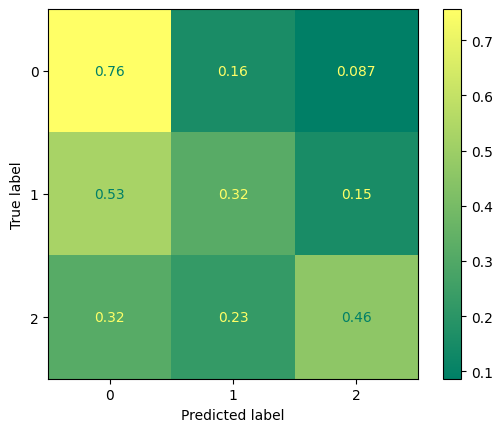

              precision    recall  f1-score   support

           1       0.56      0.76      0.64       599
           2       0.43      0.32      0.37       440
           3       0.61      0.46      0.52       408

    accuracy                           0.54      1447
   macro avg       0.53      0.51      0.51      1447
weighted avg       0.53      0.54      0.52      1447

f1 score macro: 0.5099337102596654


In [48]:
naive_bayes()

In [49]:
#Naive Bayes with cleaning stopwords
import numpy as np
import pandas as pd

import pandas as pd
from textwrap import wrap
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
from collections import Counter


df_train = pd.read_csv('/Users/nfanlo/dev/spanish-classifier-tfg/dataset/60-20-20/train.csv')
print(df_train.shape)
df_train.isnull().sum()
df_train.sentiment.replace("P" , 2 , inplace = True)
df_train.sentiment.replace("N" , 0 , inplace = True)
df_train.sentiment.replace("NEU" , 1, inplace = True)
df_train.head()
df_train['review'] = df_train['text']
df_train.drop('text', axis=1, inplace=True)
df_train['label'] = df_train['sentiment']
df_train.drop('sentiment', axis=1, inplace=True)

df_dev = pd.read_csv('/Users/nfanlo/dev/spanish-classifier-tfg/dataset/60-20-20/dev.csv')
print(df_dev.shape)
df_dev.isnull().sum()
df_dev.sentiment.replace("P" , 2 , inplace = True)
df_dev.sentiment.replace("N" , 0 , inplace = True)
df_dev.sentiment.replace("NEU" , 1, inplace = True)
df_dev['review'] = df_dev['text']
df_dev.drop('text', axis=1, inplace=True)
df_dev['label'] = df_dev['sentiment']
df_dev.drop('sentiment', axis=1, inplace=True)

(4340, 2)
(1447, 2)


In [50]:
##CUSTOM DEFINED FUNCTIONS TO CLEAN THE TWEETS

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

In [51]:
def clean_reviews(df):
    cleaned_reviews = []
    for t in df.review:
        cleaned_reviews.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(t)))))
    return cleaned_reviews


review_new_train = clean_reviews(df_train)
review_new_dev = clean_reviews(df_dev)

In [52]:
df_train['review'] = review_new_train
df_dev['review'] = review_new_dev

X_train = df_train.iloc[:, 0]
y_train = df_train.iloc[:, 1]
X_dev = df_dev.iloc[:, 0]
y_dev = df_dev.iloc[:, 1]

In [53]:
X_train
X_dev

0       ola wapa k tal stas spero k no seas una sorra ...
1                               tu optimismo es admirable
2                       que coraje me dan lxs prepotentxs
3            limo sadboy de mierda la vida es maravillosa
4       al discurso de obama le falt el qu hubieran he...
                              ...                        
1442                  nadie quiere ir a tomar caf conmigo
1443            sorry not sorry pd quedamos en medievales
1444    es lo que tiene amazon a uno que conozco le ll...
1445    que bueno que no soy mam sera la peor de todas...
1446        tener grandes eectativas a futuro eso es vida
Name: review, Length: 1447, dtype: object

In [54]:
#function that create and fit the naive bayes model
def naive_bayes():
    count_vect = CountVectorizer()
    X_train_count = count_vect.fit_transform(X_train)
    X_test_count = count_vect.transform(X_dev)

    param_grid = [{'alpha':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                 0.7, 0.8, 0.9, 1]}]

    mln = MultinomialNB()
    clf = GridSearchCV(mln, param_grid,cv=4)
    clf.fit(X_train_count, y_train)

    print("optimun alpha:{}".format(
          clf.best_params_['alpha']))

    print("accuracy: {}".format(
          clf.score(X_test_count, y_dev)))

    y_dev_pred = clf.predict(X_test_count)
    conf_matrix = plot_confusion_matrix(
                  clf,X_test_count, y_dev,
                  cmap=plt.cm.summer, normalize='true')
    plt.show()
    
    target_names = ['1', '2', '3']
    print(classification_report(y_dev, y_dev_pred, target_names=target_names))
    print("f1 score macro:", f1_score(y_dev, y_dev_pred, average='macro'))

optimun alpha:0.9
accuracy: 0.5514858327574291


/Users/nfanlo/Library/Python/3.8/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


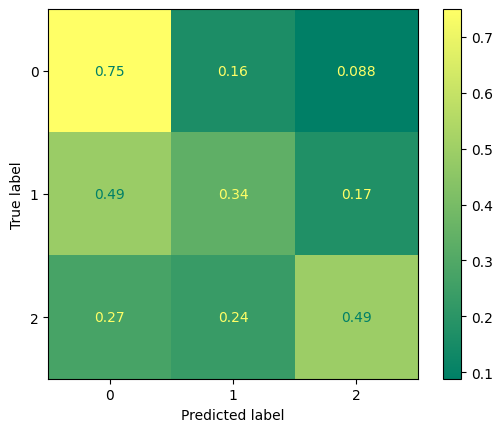

              precision    recall  f1-score   support

           1       0.58      0.75      0.65       599
           2       0.43      0.34      0.38       440
           3       0.61      0.49      0.54       408

    accuracy                           0.55      1447
   macro avg       0.54      0.53      0.53      1447
weighted avg       0.54      0.55      0.54      1447

f1 score macro: 0.5255152865052027


In [55]:
naive_bayes()